In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


### Data Visualization

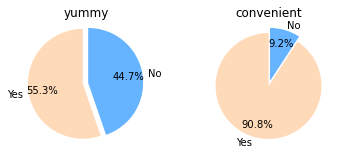

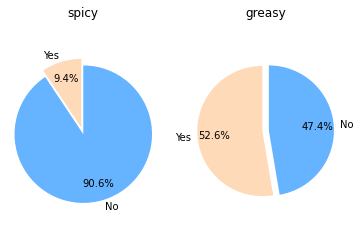

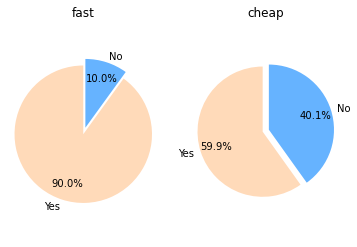

In [6]:
labels = ["Yes", "No"]

colors = ["#ffdaB9","#66b3ff"]
explode = (0.05, 0.05)
circle_plot = plt.Circle((0,0),0.7,color='white')


fig, (ax1,ax2) = plt.subplots(1,2)


sizes = [df['yummy'].value_counts()['Yes'], df['yummy'].value_counts()['No']]
ax1.set_title('yummy')
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode=explode)
ax1.axis('equal')


sizes = [df['convenient'].value_counts()['Yes'], df['convenient'].value_counts()['No']]
ax2.set_title('convenient')
ax2.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode=explode)
ax2.axis('equal')
plt.subplots_adjust(top=0.55)
plt.show()


fig, (ax3,ax4) = plt.subplots(1,2)
sizes = [df['spicy'].value_counts()['Yes'], df['spicy'].value_counts()['No']]
ax3.set_title('spicy')
ax3.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode=explode)
ax3.axis('equal')

sizes = [df['greasy'].value_counts()['Yes'], df['greasy'].value_counts()['No']]
ax4.set_title('greasy')
ax4.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode=explode)
ax4.axis('equal')
plt.show()

fig, (ax5,ax6) = plt.subplots(1,2)
sizes = [df['fast'].value_counts()['Yes'], df['fast'].value_counts()['No']]
ax5.set_title('fast')
ax5.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode=explode)
ax5.axis('equal')

sizes = [df['cheap'].value_counts()['Yes'], df['cheap'].value_counts()['No']]
ax6.set_title('cheap')
ax6.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode=explode)
ax6.axis('equal')

plt.show()

<AxesSubplot:xlabel='VisitFrequency', ylabel='count'>

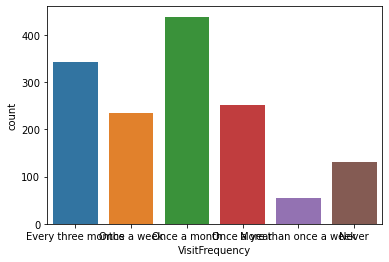

In [7]:
sns.countplot(x='VisitFrequency',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

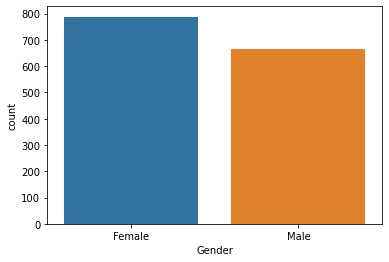

In [8]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='VisitFrequency', ylabel='count'>

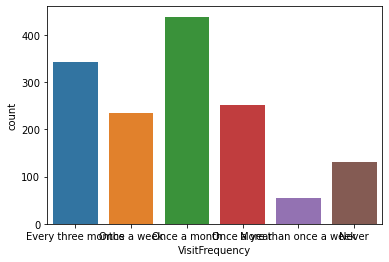

In [9]:

sns.countplot(x='VisitFrequency',data=df)

### Processing the data by changing the categorical types

#### Binary encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

list_cols = ['yummy','convenient','spicy','fattening',
             'greasy','fast','cheap','tasty',
             'expensive','healthy','disgusting','Gender']
le = LabelEncoder()
df[list_cols] = df[list_cols].apply(le.fit_transform)

In [11]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1


#### Mulitple Label encoding

In [12]:
le_1 = LabelEncoder()
df.loc[:,'Like'] = pd.factorize(df['Like'])[0].reshape(-1,1)
df.loc[:,'VisitFrequency'] = pd.factorize(df['VisitFrequency'])[0].reshape(-1,1)

In [13]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,2,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,1,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


#### Now all the features have the same data type \n \n
## Applying Min Max Scaler


In [15]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
x = scaler.fit_transform(df)

In [16]:
processsed_df = pd.DataFrame(x,columns=df.columns)
processsed_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.811321,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.1,0.622642,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.2,0.830189,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.3,0.962264,0.2,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1,0.584906,0.4,1.0


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(processsed_df)

KMeans(n_clusters=5)

In [18]:
some_clients = processsed_df.iloc[4:8,:]

In [19]:
some_clients, some_clients.shape

(   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
 4    0.0         1.0    0.0        1.0     1.0   1.0    1.0    0.0        0.0   
 5    1.0         1.0    0.0        1.0     0.0   1.0    1.0    1.0        0.0   
 6    1.0         1.0    1.0        1.0     0.0   1.0    0.0    1.0        1.0   
 7    1.0         1.0    0.0        1.0     1.0   1.0    1.0    1.0        0.0   
 
    healthy  disgusting  Like       Age  VisitFrequency  Gender  
 4      1.0         0.0   0.1  0.584906             0.4     1.0  
 5      0.0         0.0   0.1  0.698113             0.0     1.0  
 6      1.0         0.0   0.1  0.716981             0.0     0.0  
 7      0.0         0.0   0.4  0.094340             0.2     0.0  ,
 (4, 15))

In [20]:
kmeans.predict(some_clients)

array([1, 4, 2, 0], dtype=int32)

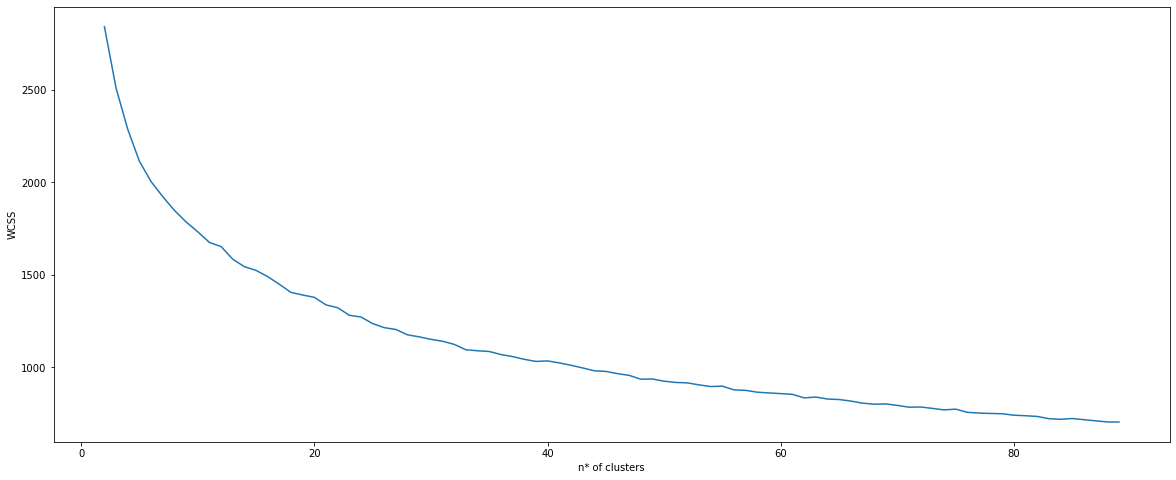

In [21]:
wcss = []
nclus = range(2,90)
for k in nclus:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(processsed_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,8))
plt.plot(nclus,wcss)
plt.xlabel("n* of clusters")
plt.ylabel("WCSS")
plt.show()